# Question 1

Load the data from the file *trajectory.csv*. The data consists of three rows representing a trajectory. The first row represents time, the second row represents the $x$-coordinate at each timestep, and the third row represents the $y$-coordinate.

**Q1 a (3 marks)**

Plot the $x$-coordinate against time (i.e., t-x figure) and also for the $y$-coordinate (i.e., t-y figure). Also plot the trajectory in 2D (i.e., x-y figure).

You need to respectively use variables 't', 'x', 'y' to represent time, x-coordinate, and y-coordinate, as these variables will be needed in other questions.

[0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.06
 0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115 0.12
 0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175 0.18
 0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235 0.24
 0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295 0.3
 0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355 0.36
 0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415 0.42
 0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475 0.48
 0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535 0.54
 0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595 0.6
 0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655 0.66
 0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715 0.72
 0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775 0.78
 0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.82  0.825 0.83  0.835

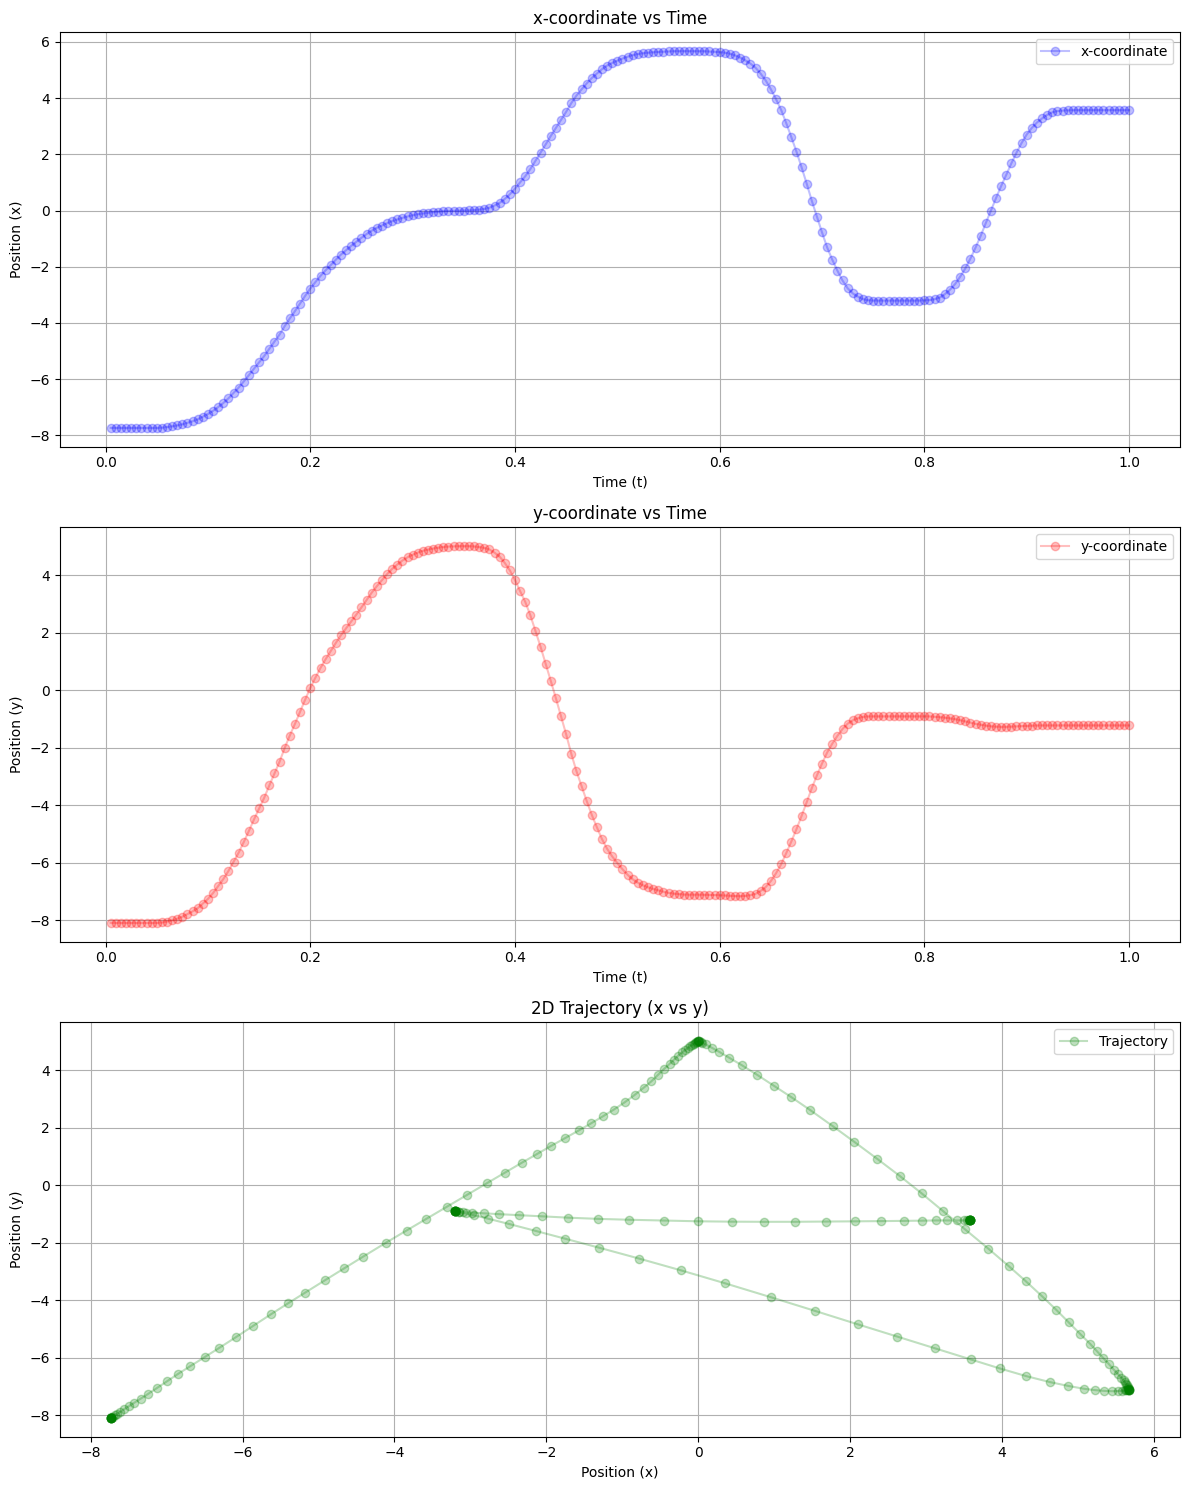

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('trajectory.csv', header=None)

# Extract the variables
t = data.iloc[1, 1:].astype(float).values  # First row without header
x = data.iloc[2, 1:].astype(float).values  # Second row without header
y = data.iloc[3, 1:].astype(float).values  # Third row without header

print(t)

# Plot the data
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Plot x vs t
ax[0].plot(t, x, marker='o', color='blue', label='x-coordinate', alpha=0.25)
ax[0].set_xlabel('Time (t)')
ax[0].set_ylabel('Position (x)')
ax[0].set_title('x-coordinate vs Time')
ax[0].grid(True)
ax[0].legend()

# Plot y vs t
ax[1].plot(t, y, marker='o', color='red', label='y-coordinate',alpha=0.25)
ax[1].set_xlabel('Time (t)')
ax[1].set_ylabel('Position (y)')
ax[1].set_title('y-coordinate vs Time')
ax[1].grid(True)
ax[1].legend()

# Plot x vs y (trajectory in 2D)
ax[2].plot(x, y, marker='o', color='green', label='Trajectory',alpha=0.25)
ax[2].set_xlabel('Position (x)')
ax[2].set_ylabel('Position (y)')
ax[2].set_title('2D Trajectory (x vs y)')
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()
plt.show()

### Linear regression using two different sets of basis functions
 
The following code blocks show two attempts to perform linear regression. The only difference is the choice of basis functions. The first one is based on exponential:

In [30]:
import numpy as np
basis_num = 50# number of basis functions

def exponential_basis_function(t, basis_num):
    c = np.zeros(basis_num)  # centers of basis functions
    h = np.zeros(basis_num)  # widths of basis functions
    for i in range(basis_num):
        c[i] = 1.0 / basis_num * i
        h[i] = 10
    res = np.exp(-h * (t - c) ** 2)
    return res

def fit_exponential(basis_num, t):
    phi_pred = np.zeros((len(t), basis_num))    # shape: 200 * basis_num 
    for idx, tt in enumerate(t):
        phi = exponential_basis_function(tt, basis_num)
        addsum = np.sum(phi, axis=-1)
        # Adding a very small value to aviod division by zero
        eps = 1e-12
        phi_pred[idx] = phi / (addsum + eps)
    return phi_pred

The second one uses polynomials as basis functions:

In [31]:
def polynomial_basis_function(t):
    # a polynomial basis function
    res1 = np.ones_like(t)
    res2 = t
    res3 = t**2
    res4 = t**3
    res = np.stack([res1, res2, res3, res4]).T
    return res

Fit the 2-D trajectory using exponential basis functions and predict a 2-D trajectory [x y] for all time inputs t

In [32]:
Phi = fit_exponential(basis_num, t)  
pos = np.stack([x, y]).T
w = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ pos
predict_pos_exp = Phi @ w

**Q1 b (6 marks)**

b1. The correct predictions for the exponential basis functions have already been provided above. Employ linear regression to fit the trajectories with polynomial basis functions (defined by 'polynomial_basis_function(t)').

b2. Plot the $x$-coordinate of the original data set against time (i.e., t-x plot) in one figure. Do the same for the $y$-coordinate (i.e., t-y plot) in another figure. Now overlay the predictions using the exponential basis functions (i.e., plot "predicted x against t" and "original x against t" in the same figure, plot "predicted y against t" and "original y against t" in the same figure). Do the same for the predictions based on the polynomial basis functions.

b3. Also plot the 2D (i.e., x-y) trajectory of the original data and the predicted 2D trajectories for the exponential and polynomial basis functions.

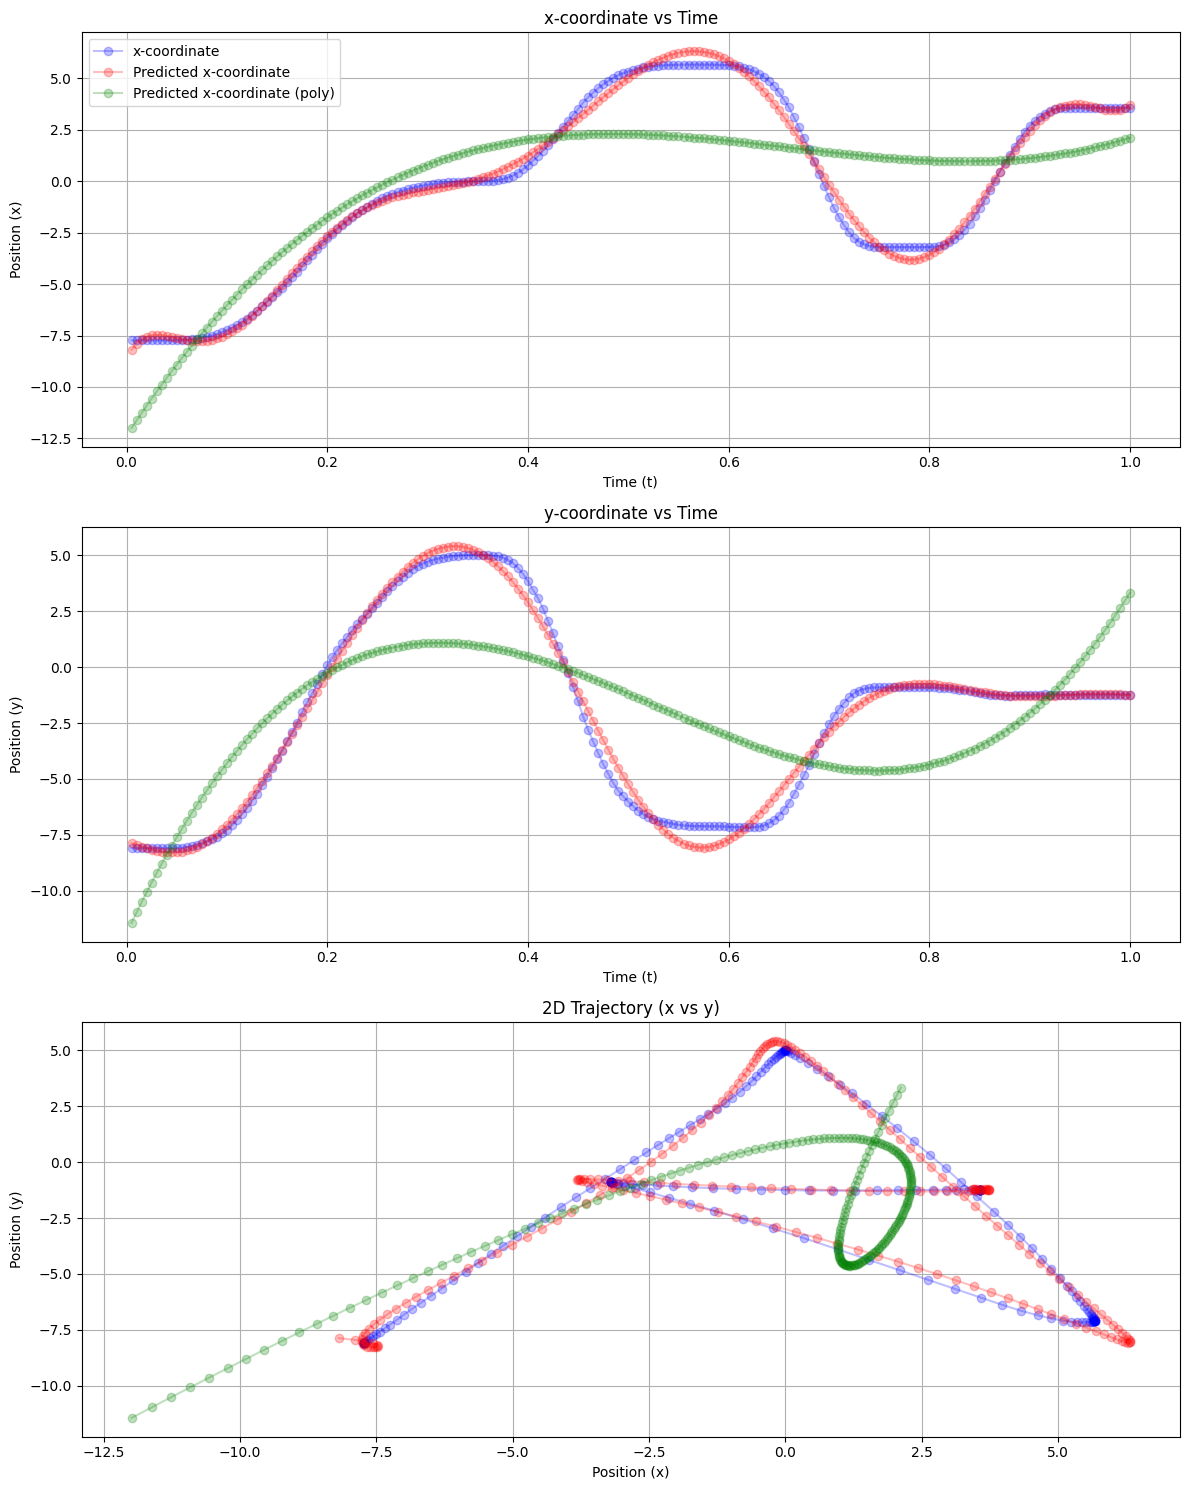

In [33]:
# Employing linear regression to fit the trajectories with polynomial basis functions
Phi_poly = polynomial_basis_function(t)
w_poly = np.linalg.pinv(Phi_poly.T @ Phi_poly) @ Phi_poly.T @ pos
predict_pos_poly = Phi_poly @ w_poly

# Plot the data (x-t) (y-t) (predicted x-t) (predicted y-t)
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
ax[0].plot(t, x, marker='o', color='blue', label='x-coordinate', alpha=0.25)
ax[0].plot(t, predict_pos_exp[:, 0], marker='o', color='red', label='Predicted x-coordinate', alpha=0.25)
ax[0].plot(t, predict_pos_poly[:, 0], marker='o', color='green', label='Predicted x-coordinate (poly)', alpha=0.25)
ax[0].set_xlabel('Time (t)')
ax[0].set_ylabel('Position (x)')
ax[0].set_title('x-coordinate vs Time')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(t, y, marker='o', color='blue', label='y-coordinate', alpha=0.25)
ax[1].plot(t, predict_pos_exp[:, 1], marker='o', color='red', label='Predicted y-coordinate', alpha=0.25)
ax[1].plot(t, predict_pos_poly[:, 1], marker='o', color='green', label='Predicted y-coordinate (poly)', alpha=0.25)
ax[1].set_xlabel('Time (t)')
ax[1].set_ylabel('Position (y)')
ax[1].set_title('y-coordinate vs Time')
ax[1].grid(True)

ax[2].plot(x, y, marker='o', color='blue', label='Trajectory', alpha=0.25)
ax[2].plot(predict_pos_exp[:, 0], predict_pos_exp[:, 1], marker='o', color='red', label='Predicted Trajectory', alpha=0.25)
ax[2].plot(predict_pos_poly[:, 0], predict_pos_poly[:, 1], marker='o', color='green', label='Predicted Trajectory (poly)', alpha=0.25)
ax[2].set_xlabel('Position (x)')
ax[2].set_ylabel('Position (y)')
ax[2].set_title('2D Trajectory (x vs y)')
ax[2].grid(True)

plt.tight_layout()
plt.show()

In [34]:
# Compare the performance of the two models by using Root Mean Square Error (RMSE)
def RMSE(predict, pos):
    return np.sqrt(np.mean((predict - pos) ** 2))

rmse_exp = RMSE(predict_pos_exp, pos)
rmse_poly = RMSE(predict_pos_poly, pos)
print('RMSE of exponential basis function:', rmse_exp)
print('RMSE of polynomial basis function:', rmse_poly)

RMSE of exponential basis function: 0.4155870648195528
RMSE of polynomial basis function: 2.7442829958235713


**Q1 c (8 marks)**

If you have done the previous question correctly, one set of basis functions appears to deliver much better predictions than the other set of basis functions. On closer inspection you will find that the number of basis functions used in the best predictions is much larger than for the poor predictions. We must compare like with like so modify the code so that
you can control the number of basis functions. Then plot both sets of predictions for 2, 5, 10 and 50 basis functions. Show these 2D plots and comment if you can really say that one set of basis functions outperforms the other, qualitatively.

In [35]:
# Creating a function that creates the basis function of a given degree
def polyBasisFunc(basisNum: int, t: np.ndarray) -> np.ndarray:
    t = t.reshape(-1, 1) # Reshape t to a column vector
    res = np.zeros((len(t), basisNum))
    for i in range(basisNum):
        res[:, i] = t.flatten() ** i
    return res

def fitModels(phiModel, y):
    return np.linalg.pinv(phiModel.T @ phiModel) @ phiModel.T @ y

def predictModels(phiModel, weights):
    return phiModel @ weights


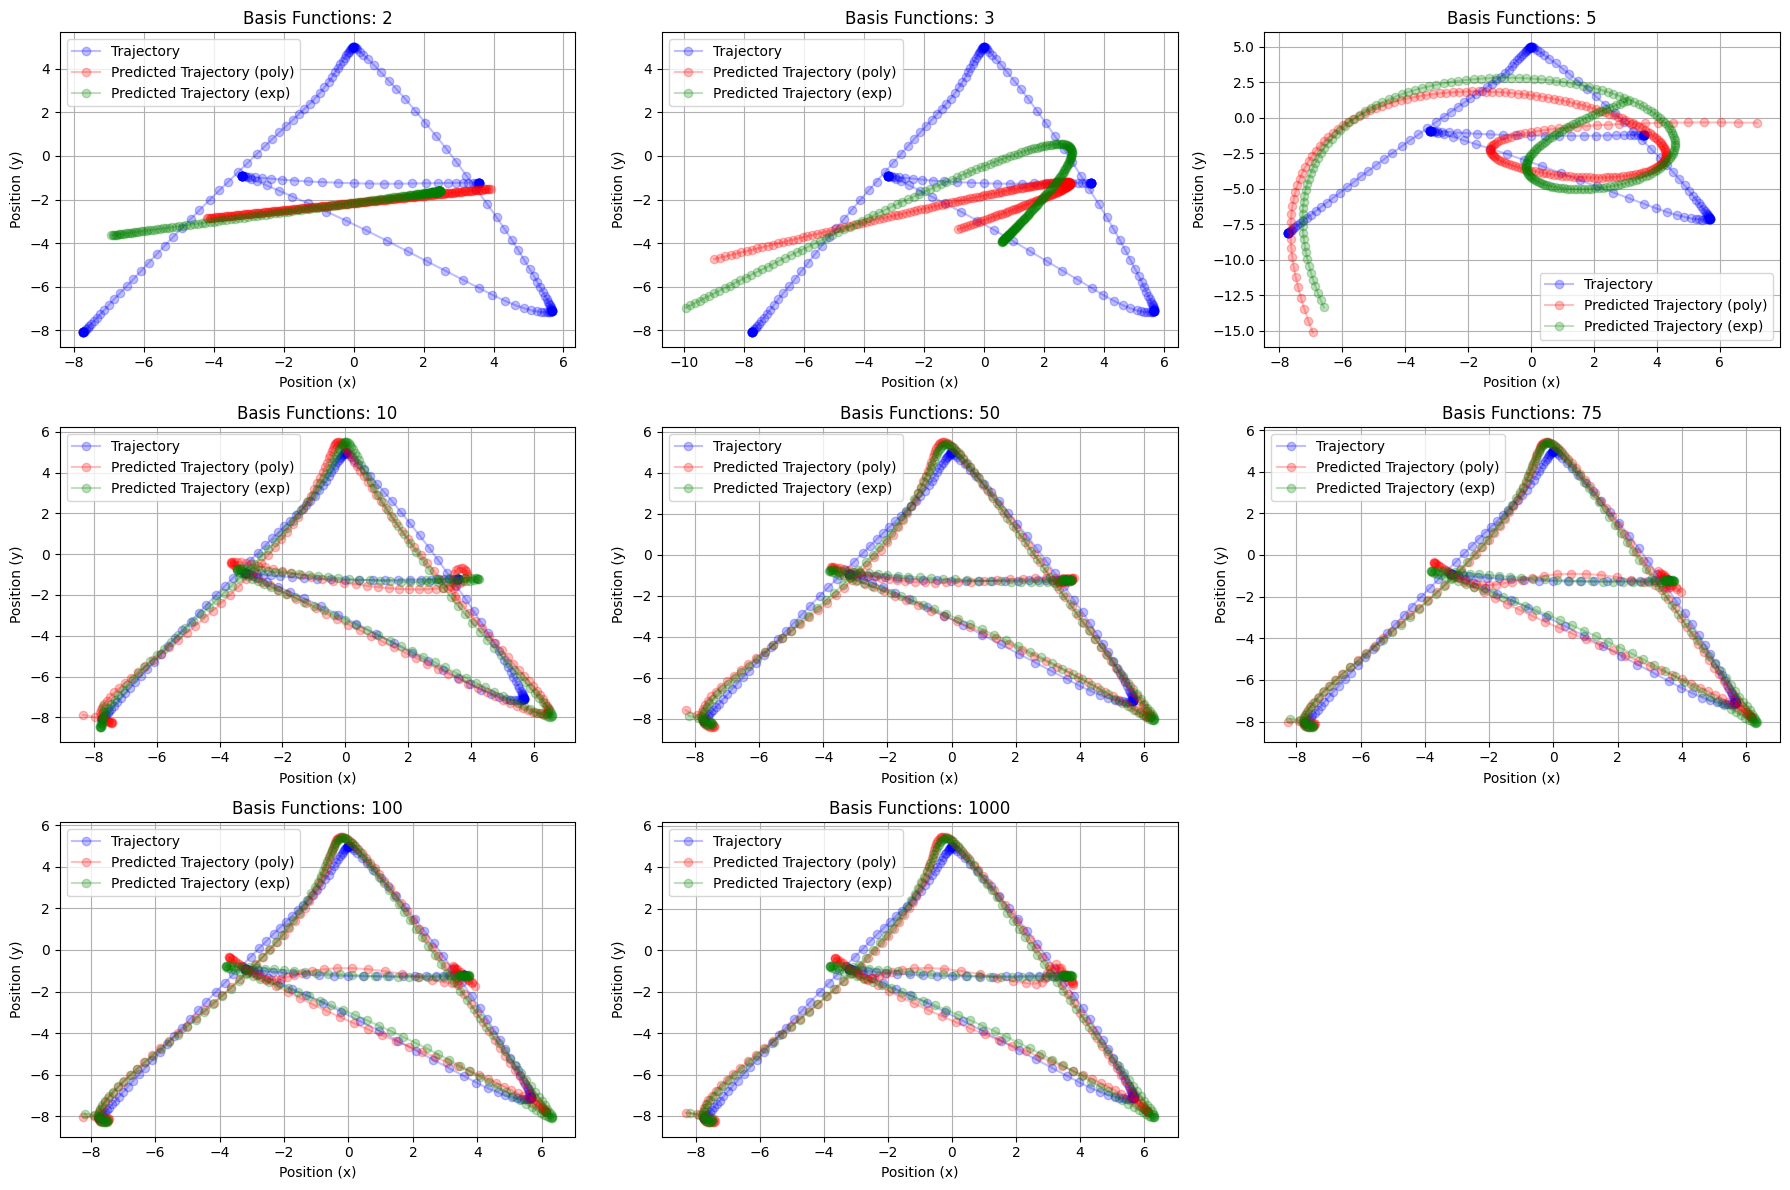

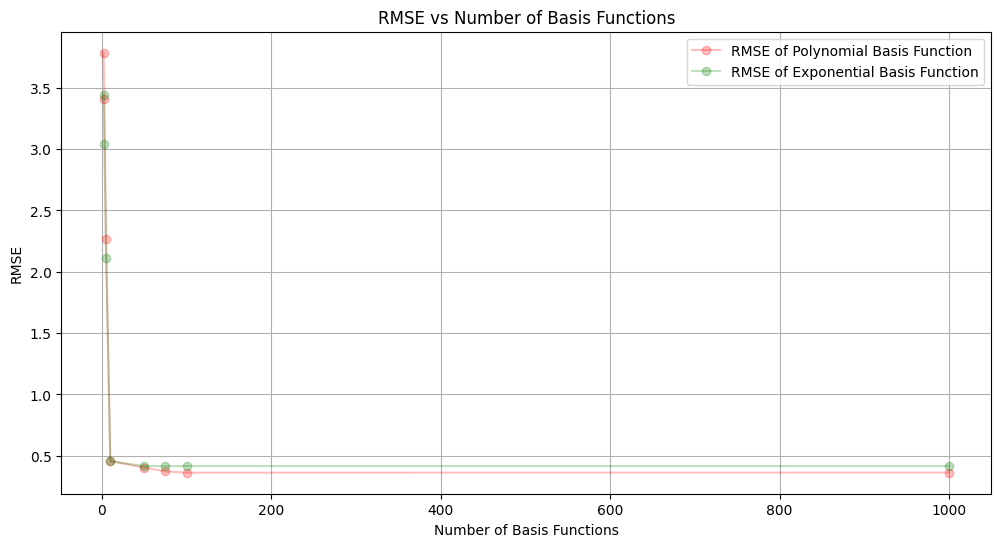

RMSE values of Polynomial and Exponential Basis Functions:

                           Polynomial  Exponential
Number of Basis Functions                         
2                            3.786908     3.443718
3                            3.407959     3.043127
5                            2.266244     2.113437
10                           0.456610     0.454303
50                           0.402843     0.415587
75                           0.372252     0.415597
100                          0.361149     0.415603
1000                         0.362230     0.415617


In [36]:
def compareBasisFunctions(basisNums: list, t: np.ndarray, pos: np.ndarray):
    plt.figure(figsize=(18, 12))

    rmse = np.zeros((len(basisNums), 2))
    
    for idx, basisNum in enumerate(basisNums):
        # Generate the basis function
        phiPoly = polyBasisFunc(basisNum, t)
        phiExp = fit_exponential(basisNum, t)
        
        # Fit the model
        wPoly = fitModels(phiPoly, pos)
        wExp = fitModels(phiExp, pos)
        
        # Predict the model
        predictPoly = predictModels(phiPoly, wPoly)
        predictExp = predictModels(phiExp, wExp)
        
        # Calculate the RMSE
        rmsePoly = RMSE(predictPoly, pos)
        rmseExp = RMSE(predictExp, pos)
        
        # Plot the data
        plt.subplot(3, 3, idx + 1)
        plt.plot(pos[:, 0], pos[:, 1], marker='o', color='blue', label='Trajectory', alpha=0.25)
        plt.plot(predictPoly[:, 0], predictPoly[:, 1], marker='o', color='red', label='Predicted Trajectory (poly)', alpha=0.25)
        plt.plot(predictExp[:, 0], predictExp[:, 1], marker='o', color='green', label='Predicted Trajectory (exp)', alpha=0.25)
        plt.title(f'Basis Functions: {basisNum}')
        plt.xlabel('Position (x)')
        plt.ylabel('Position (y)')
        plt.grid(True)
        plt.legend()

        # Store the RMSE values
        rmse[idx] = [rmsePoly, rmseExp]

    plt.tight_layout()
    plt.show()

    # Plot the RMSE values
    plt.figure(figsize=(12, 6))
    plt.plot(basisNums, rmse[:, 0], marker='o', color='red', label='RMSE of Polynomial Basis Function', alpha=0.25)
    plt.plot(basisNums, rmse[:, 1], marker='o', color='green', label='RMSE of Exponential Basis Function', alpha=0.25)
    plt.xlabel('Number of Basis Functions')
    plt.ylabel('RMSE')
    plt.title('RMSE vs Number of Basis Functions')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Display the RMSE values as a table
    df = pd.DataFrame(rmse, index=basisNums, columns=['Polynomial', 'Exponential'])
    df.index.name = 'Number of Basis Functions'
    print('RMSE values of Polynomial and Exponential Basis Functions:\n')
    print(df)

# Compare the performance of the two models by using Root Mean Square Error (RMSE) and plot the results
basisNums = [2, 3, 5, 10, 50, 75, 100, 1000]
compareBasisFunctions(basisNums, t, pos)

### Results Interpretation
  In the previous experiment we used a set of numbers of basis functions to effectively the performance of each of the kernel. We will notice that the exponential basis function is perfoming betther than the polynomial basis function throughout the process of adding new basis function.

At the first glance,the RMSE of the polynomial basis function had less RMSE than the exponential, which contradicts what I have stated, for example when basisNum is 75. The key observation is that RMSE alone does not capture the ability of the function to handle oscillations effectively. Its true that the RMSE value of the polynomial is much less than the exponential kernel. However, if we refered to the graphs ploted above, which shows the trajectory of the objects, we will notice that the polynomial function introduced randomness which really does not dipict the actual path, this noise is due to overfitting.

 Polynomials basis function performs well when the number of the basis functions are moderate (between 10, 25) since they stuggles when dealing with localized oscillations in the dataset. The mathematical inutition for this observation is that polynomials are a global function which means that the higher degress term in the polynomial affects the entire performance of the model leading to overfitting. 

 In contrast, exponentiual function through they converges slowly, but excels if there is some sort of oscillatory beahavior due to their localized nature that allows them to capture  sharp variations without introducing an considering the global artificats, which illustrates its robustness across varying dataset complexities.

**Q1 d (5 marks)**

Consider what basis functions (beyond exponential or the polynomial basis functions) might be suitable to model the data "data2.npy". In "data2.npy", the first column is time t while the second column is x-coordinate. You should be able to do this with a small set of basis functions and get a good fit. 

Plot your prediction and the original data in the same figure (i.e., t-x).

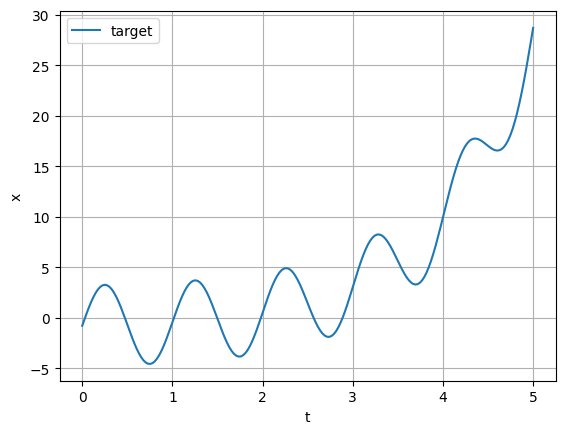

In [37]:
import numpy as np
import matplotlib.pyplot as plt

#  plot the trajectory
data = np.load("data2.npy") # size: 200*2, the first column is time input while the second column is x-coordinate.
t = data[:, 0]
target = data[:, 1]

plt.plot(t, target, label='target')
plt.legend()
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.show()

First of all we need to observe the graph above so that we can come up with a hypothesis and test whether our assumptions holds and leads us to a result. Firstly we observe that there is a oscillatory behavior on the graph which is showing clearly that there is some sort of trignomoetric functions involved in the basis function. The second think we notice is that the growth has some sort of an exponential behavior. So with a quick google search and using a bit of AI for reasoning with Wikipedia. I came across a basis function called the Fourier Basis Function. In simple words its a basis function that contains trignometry and some sort of addition of frequency to model a complex periodic nonlinear graphs, and the way that it works is by combining oscillation into a such pattern in a linear manner. The math block below will explain it further 

$$ f(t) = \alpha*sin (t) + \beta*cos(t) $$  
This is an example of a simple basis function. I will denote this as a single relative to this project as a trig-unit : A unit which containes an sine and a cosine under the same index. We will notice that alpha and beta impacts on the amplitude of the function. Now since we have the basics lets expand futher. 
$$ f(t) = \alpha_{1}sin(t) + \beta_{1}cos(t) + \alpha_{2}sin(2t) + \beta_{2}cos(2t) \dots + \alpha_{n}sin(nt) + \beta_{n}cos(nt) $$ 
So we notice that there is a pattern this is one of the fourier series , we could further simplify it into a summation 
$$ f(t) \sum ^{N}_{k=1}(a_{k}sin(kt)+ b_{k}cos(kt))$$ 
Where k is the index of frequency (number of waves per second), a and b are the wieght coefficents and  t is the input variable time. 


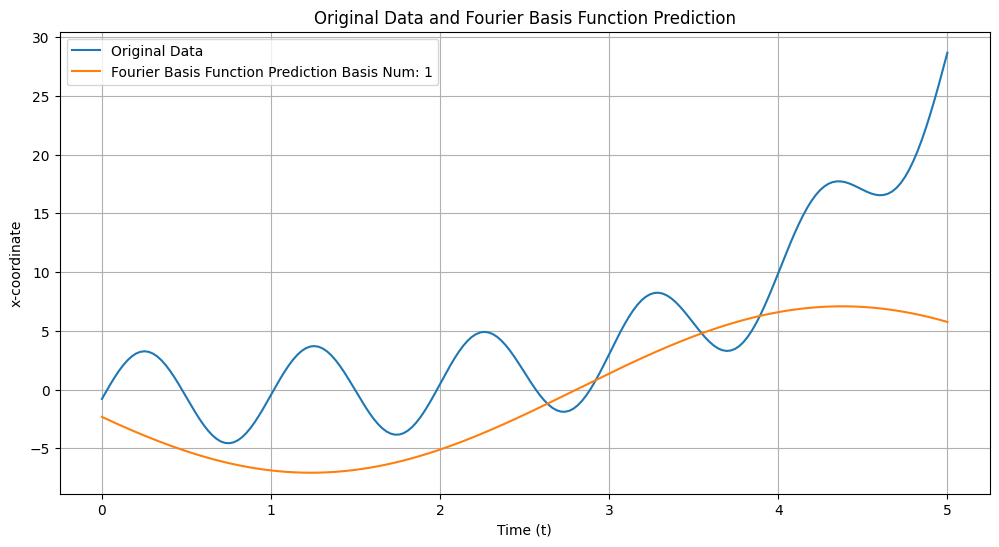

In [38]:
# Defined the fourier basis function
def fourier_basis_function(t, basis_num):
    t = t.reshape(-1, 1)  # Ensure t is a column vector
    res = np.zeros((len(t), 2 * basis_num))  # Create a matrix to store basis functions
    for i in range(basis_num):
        res[:, 2 * i] = np.sin((i + 1) * t.flatten())  # Sine term
        res[:, 2 * i + 1] = np.cos((i + 1) * t.flatten())  # Cosine term
    return res

# Plot the fourier basis functions on the original plot
basis_num = 1
phi = fourier_basis_function(t, basis_num)

# Fit the model using Fourier basis functions
w_fourier = np.linalg.pinv(phi.T @ phi) @ phi.T @ target
predict_target_fourier = phi @ w_fourier

# Plot the original data and the Fourier basis function predictions
plt.figure(figsize=(12, 6))
plt.plot(t, target, label='Original Data')
plt.plot(t, predict_target_fourier, label=f'Fourier Basis Function Prediction Basis Num: {basis_num}')
plt.xlabel('Time (t)')
plt.ylabel('x-coordinate')
plt.title('Original Data and Fourier Basis Function Prediction')
plt.grid(True)
plt.legend()
plt.show()


Now we have established the basis function for this problem. Therefore in order to find an optimal number of basis function then we need to convert the following problem into an optimization proble. Considering that we have a basis function, and a loss function. Then we need to find the optimal number of basis functions such that it minimizes the loss function. Now what we ended with the basis function which looks like this

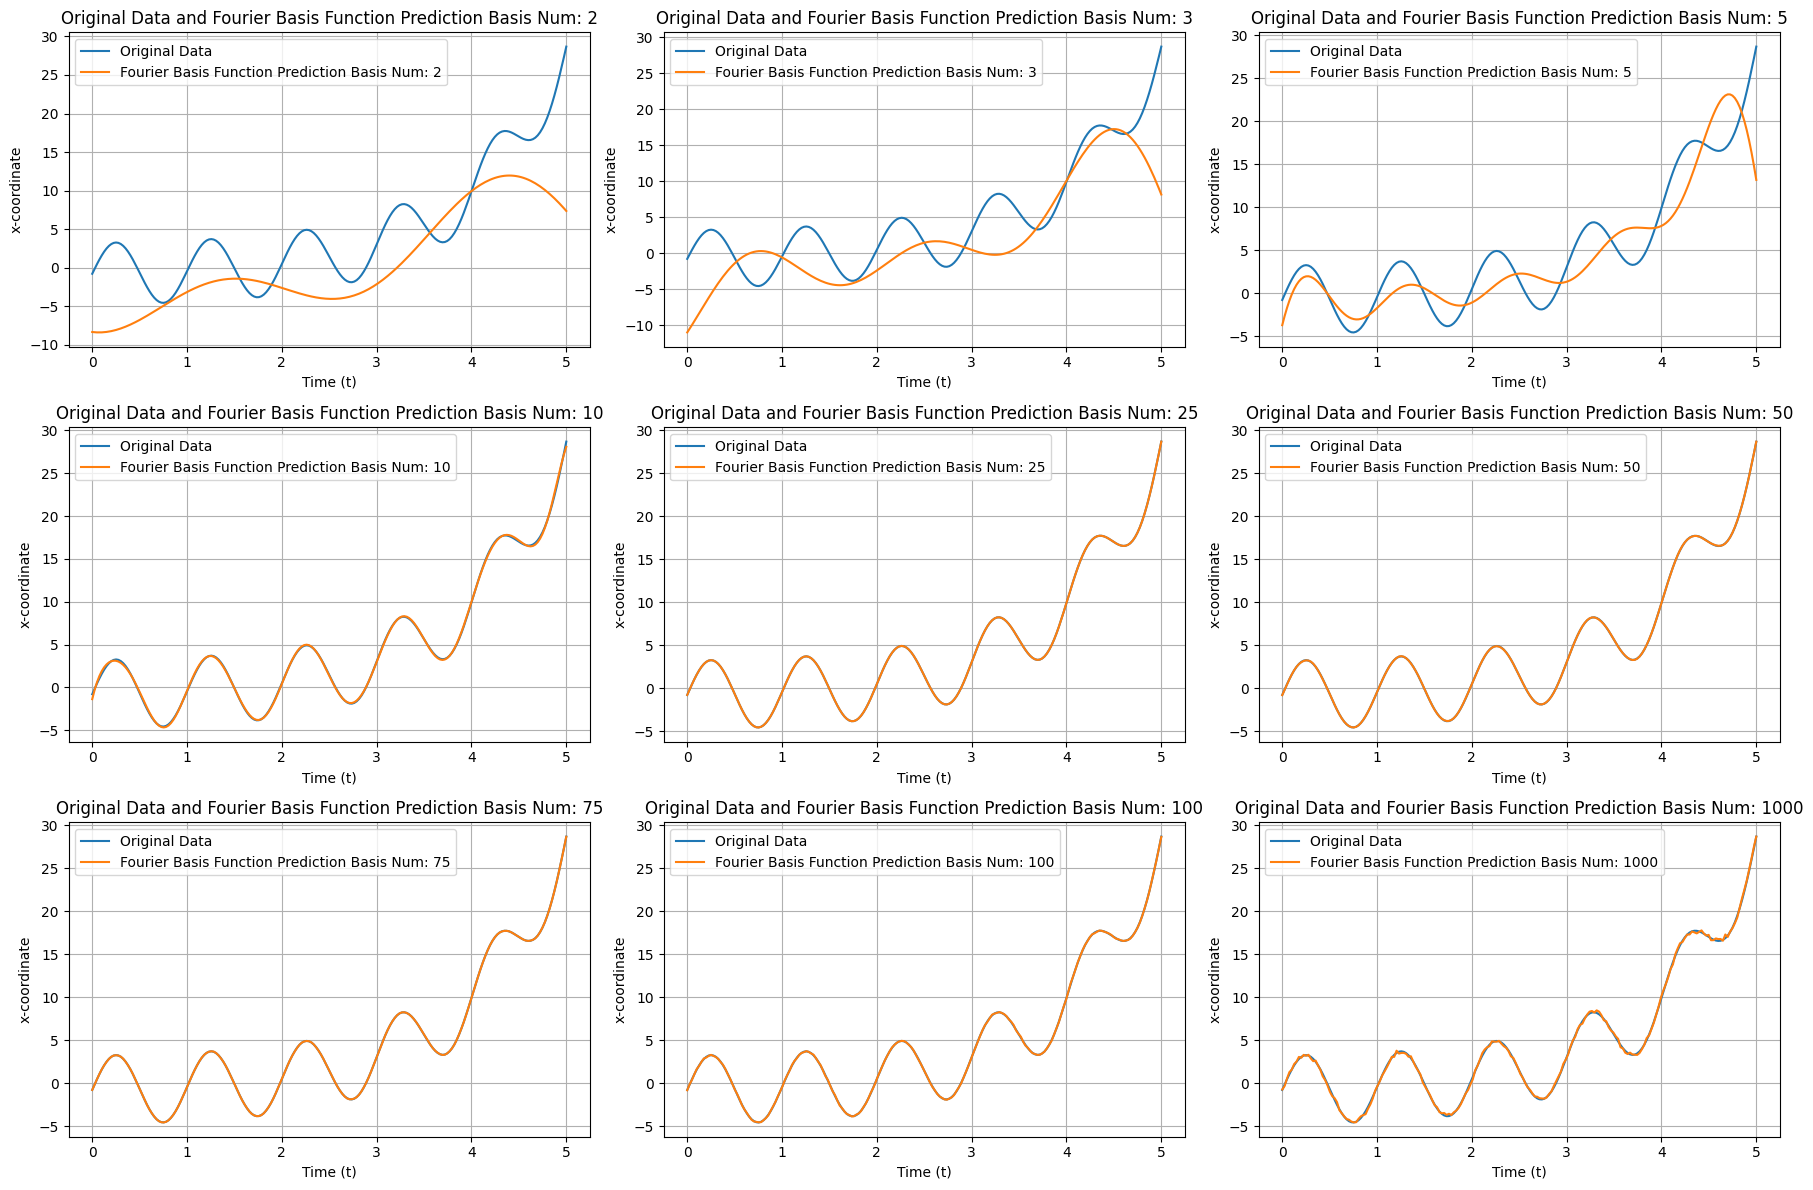

In [39]:
def fitFourier(basisNums,t):
    plt.figure(figsize=(18, 12))
    # Calculate the Root Mean Square Error for each basis function
    rmse = np.zeros((len(basisNums), 1))

    for idx, basisNum in enumerate(basisNums):
        # Generate the basis function
        phi = fourier_basis_function(t, basisNum)
        # Fit the model
        w = np.linalg.pinv(phi.T @ phi) @ phi.T @ target
        # Predict the model
        predict_target = phi @ w
        # Calculate the RMSE
        rmse[idx] = RMSE(predict_target, target)
        plt.subplot(3, 3, idx + 1)
        plt.plot(t, target, label='Original Data')
        plt.plot(t, predict_target, label=f'Fourier Basis Function Prediction Basis Num: {basisNum}')
        plt.xlabel('Time (t)')
        plt.ylabel('x-coordinate')
        plt.title(f'Original Data and Fourier Basis Function Prediction Basis Num: {basisNum}')
        plt.grid(True)
        plt.legend()
    plt.tight_layout()
    plt.show()
    return rmse

basisNums = [2, 3, 5, 10, 25, 50, 75, 100, 1000]
rootMean = fitFourier(basisNums, t)


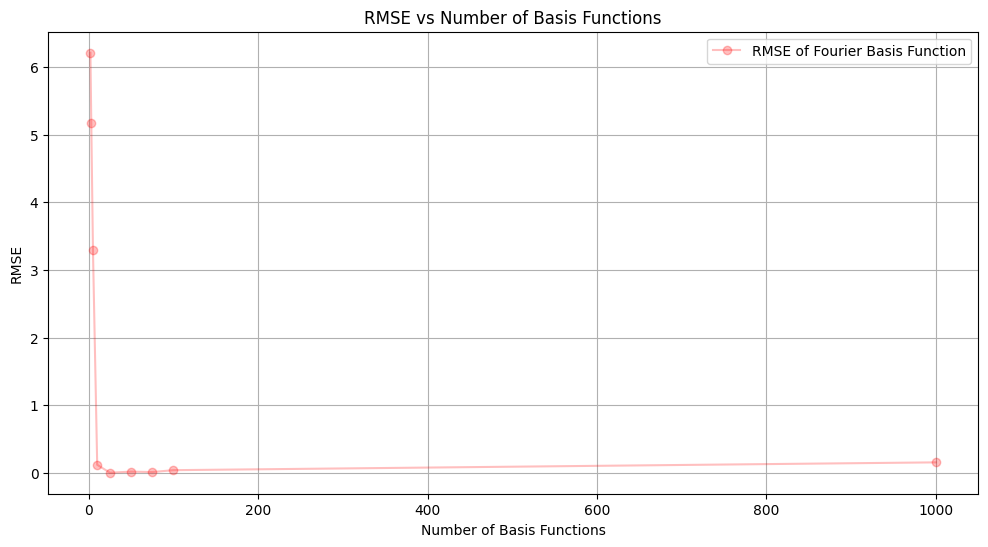

RMSE values of Fourier Basis Functions:

                            Fourier
Number of Basis Functions          
2                          6.211999
3                          5.177498
5                          3.289317
10                         0.117592
25                         0.000011
50                         0.016113
75                         0.009977
100                        0.037732
1000                       0.153145


In [40]:
#Plot the RMSE values of Fourier Basis Functions
plt.figure(figsize=(12, 6))
plt.plot(basisNums, rootMean, marker='o', color='red', label='RMSE of Fourier Basis Function', alpha=0.25)
plt.xlabel('Number of Basis Functions')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Basis Functions')
plt.grid(True)
plt.legend()
plt.show()

# Display the RMSE values of Fourier Basis Functions
print('RMSE values of Fourier Basis Functions:\n')
df = pd.DataFrame(rootMean, index=basisNums, columns=['Fourier'])
df.index.name = 'Number of Basis Functions'
print(df)



Based on the graphs and the function model we can observe that the model was able to accurately capture the behavior of the plot. And that the model almost achieve the optimal result when its around 25 basis functions are used. 

# Question 2

**Q2 a (4 marks)**

You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array, where each column corresponds to one sample. The data format in each column is: [x_1, y_1, z_1, x_2, y_2, z_2, ………, x_N, y_N, z_N], where (x_i, y_i, z_i) corresponds to the i-th 3D point of a blood vessel. By plotting all 3D points in one column, you can obtain the shape of a blood vessel of that sample.

Plot seven figures to show the 3D blood vessel shape for each sample separately. Also plot two arbitrary shapes on top of each other to get a feeling of how similar or dissimilar the shapes are.

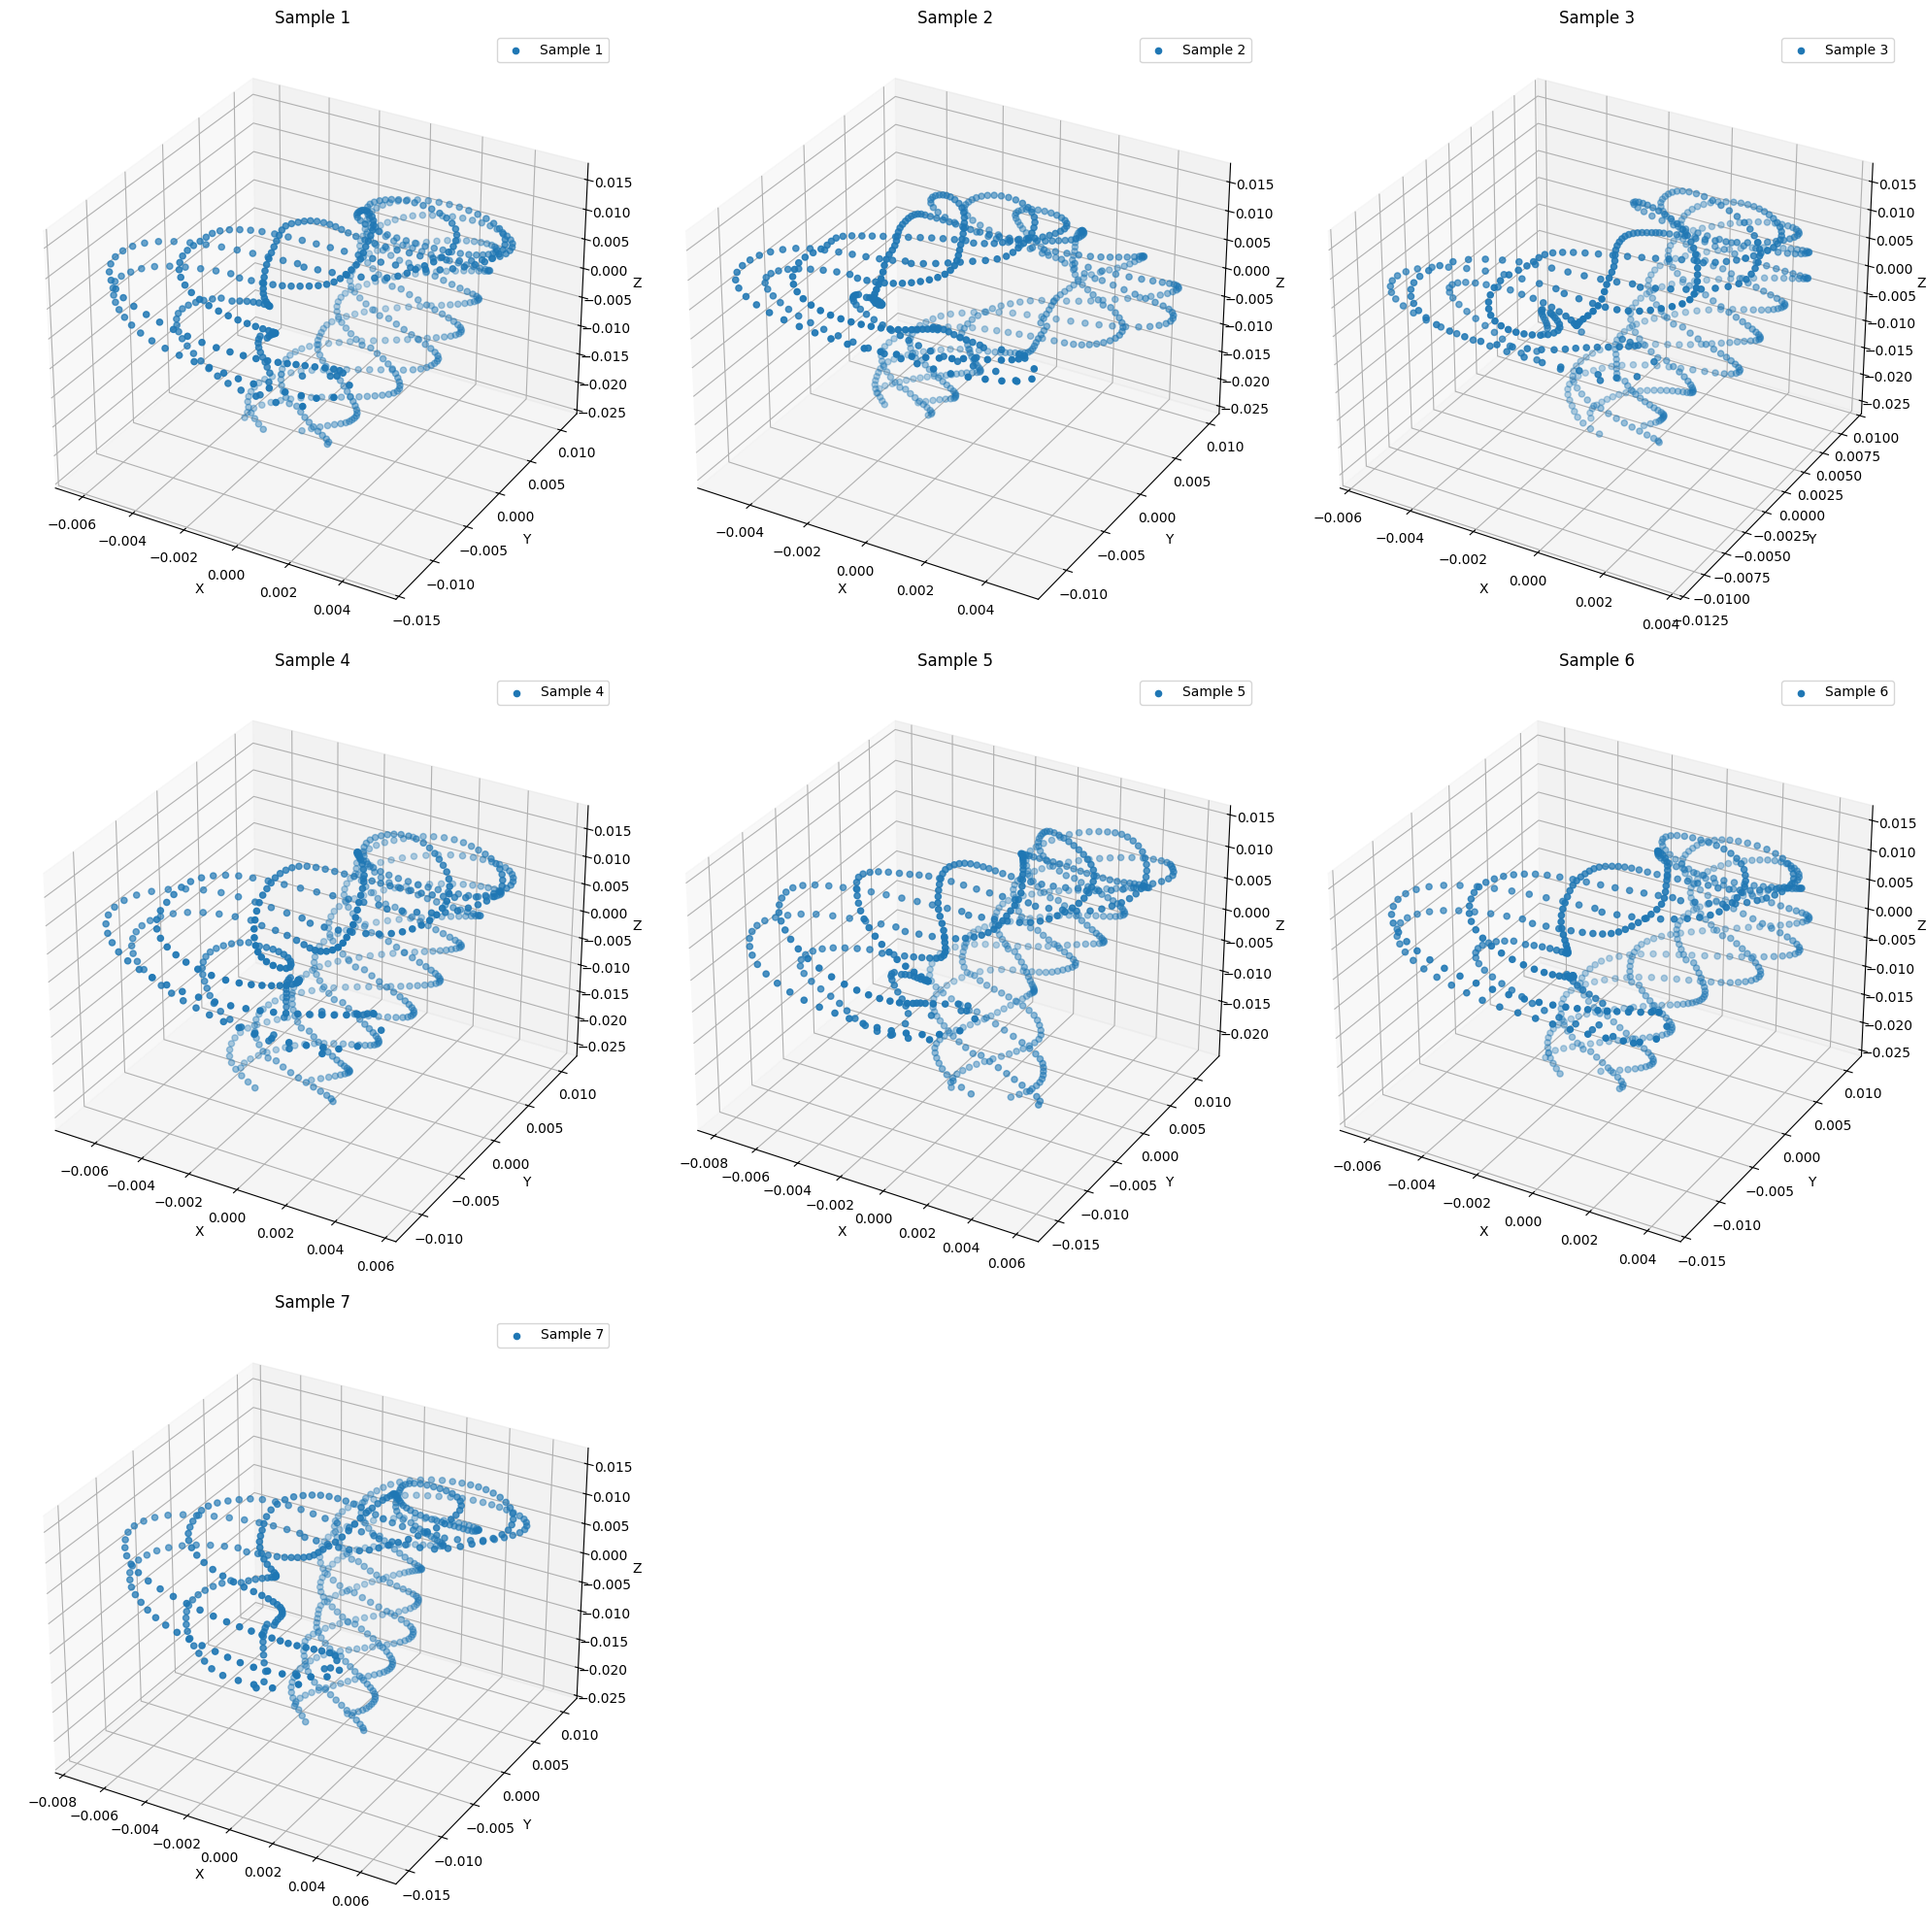

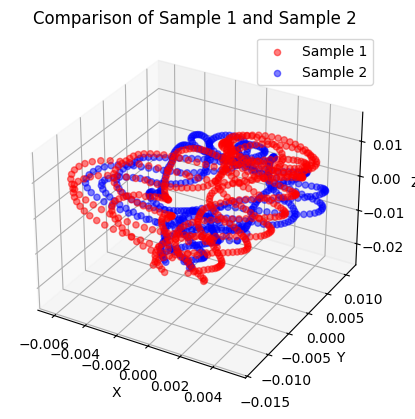

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
shape_array = np.load('shape_array.npy')

# Number of samples
num_samples = shape_array.shape[1]

# Plot the 3D blood vessel shape for each sample separately
fig = plt.figure(figsize=(20, 20))
for i in range(num_samples):
    ax = fig.add_subplot(3, 3, i + 1, projection='3d')
    sample = shape_array[:, i]
    x, y, z = sample[0::3], sample[1::3], sample[2::3]
    ax.scatter(x, y, z, label=f'Sample {i + 1}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Sample {i + 1}')
    ax.legend()

plt.tight_layout()
plt.show()

# Choose two random samples to compare their similarity 

# Plot two arbitrary shapes on top of each other to compare their similarity
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sample1 = shape_array[:, 0]
sample2 = shape_array[:, 1]
x1, y1, z1 = sample1[0::3], sample1[1::3], sample1[2::3]
x2, y2, z2 = sample2[0::3], sample2[1::3], sample2[2::3]
ax.scatter(x1, y1, z1, label='Sample 1', alpha=0.5, color='red')
ax.scatter(x2, y2, z2, label='Sample 2', alpha=0.5, color='blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Comparison of Sample 1 and Sample 2')
plt.legend()
plt.show()

**Q2 b (10 marks)** 

Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Finally, project original data onto lower-dimensional space and reconstruct data.

Proceed as follows:

1. Subtract the mean from the data, so that it is centered around the origin.

2. Estimate the covariance matrix from the centred data.

3. Calculate eigenvectors and eigenvalues using numpy functions

4. Project centered data (1845 dimension) into a lower-dimension space (You need to choose a reasonable dimension). 

5. Reconstruct the blood vessel shape from the lower dimension data in step 4.


As a sanity check plot a blood vessel shape reconstructed from the eigenvectors on top of the original blood vessel shape. Explain how much data reduction you have achieved. Comment on your results.

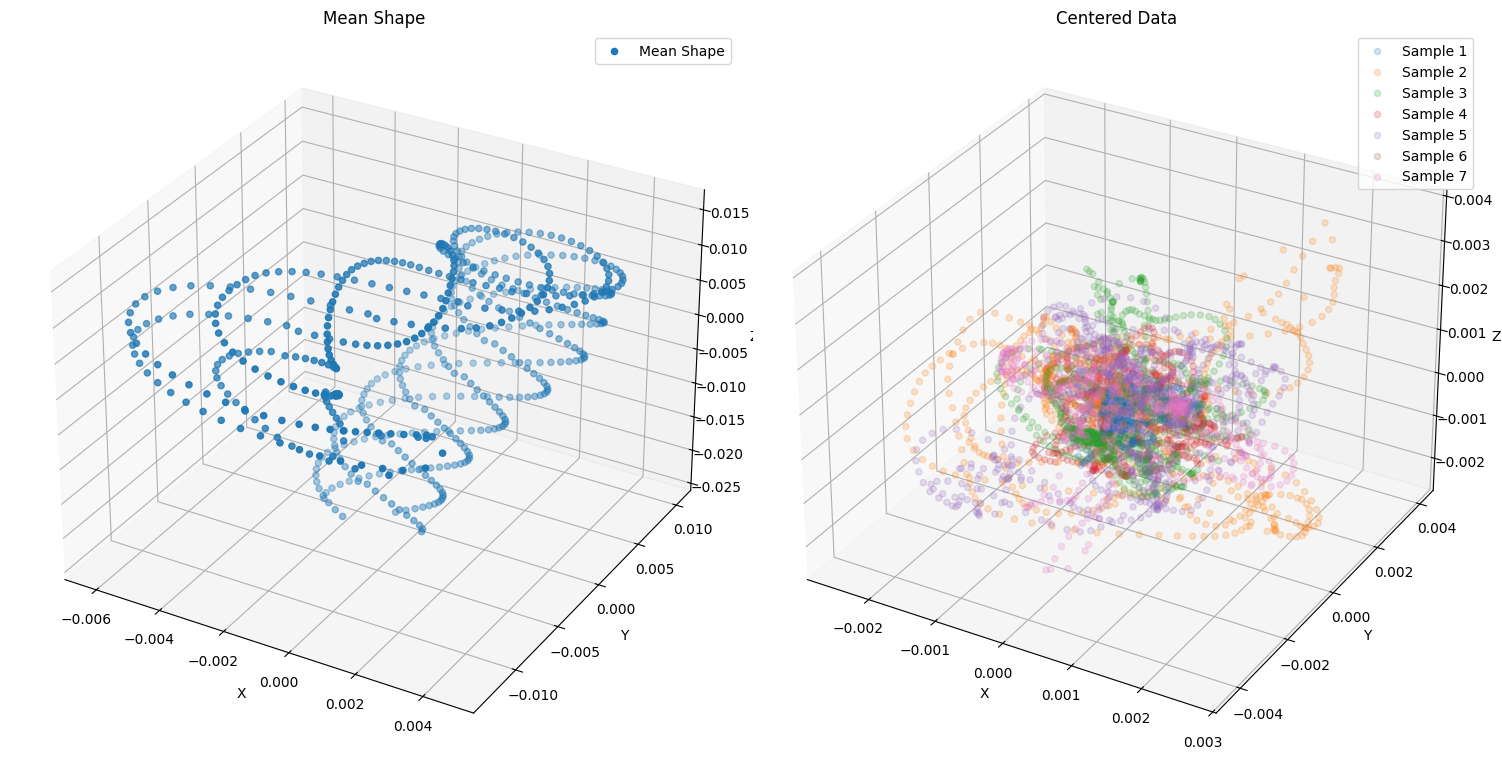

In [42]:
# Get the mean of the data
mean_data = np.mean(shape_array, axis=1, keepdims=True)

# Subtract the mean from the data
centered_data = shape_array - mean_data

# Plot the mean shape and centered data in a single figure with two subplots
fig = plt.figure(figsize=(15, 10))

# Subplot 1: Mean Shape
ax1 = fig.add_subplot(121, projection='3d')
x, y, z = mean_data[0::3], mean_data[1::3], mean_data[2::3]
ax1.scatter(x, y, z, label='Mean Shape')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Mean Shape')
ax1.legend()

# Subplot 2: Centered Data
ax2 = fig.add_subplot(122, projection='3d')
for i in range(num_samples):
    sample = centered_data[:, i]
    x, y, z = sample[0::3], sample[1::3], sample[2::3]
    ax2.scatter(x, y, z, label=f'Sample {i + 1}', alpha=0.20)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Centered Data')
ax2.legend()

plt.tight_layout()
plt.show()


cov_matrix shape: (7, 7)
[[ 1.81009809e-07 -1.28906250e-07 -2.53765702e-07 -1.78827196e-07
   2.03430124e-07  8.93828455e-09  1.68120903e-07]
 [-1.28906250e-07  1.61338358e-06  6.33403465e-07 -3.18346850e-07
  -1.11701569e-06  1.20008220e-07 -8.02526510e-07]
 [-2.53765702e-07  6.33403465e-07  1.01818360e-06  1.97943498e-07
  -9.59564114e-07 -1.26053020e-07 -5.10147672e-07]
 [-1.78827196e-07 -3.18346850e-07  1.97943498e-07  7.62267808e-07
  -3.02912628e-07 -8.39626765e-08 -7.61618685e-08]
 [ 2.03430124e-07 -1.11701569e-06 -9.59564114e-07 -3.02912628e-07
   1.50174626e-06  8.18254298e-08  5.92490550e-07]
 [ 8.93828455e-09  1.20008220e-07 -1.26053020e-07 -8.39626765e-08
   8.18254298e-08  1.14821246e-07 -1.15577511e-07]
 [ 1.68120903e-07 -8.02526510e-07 -5.10147672e-07 -7.61618685e-08
   5.92490550e-07 -1.15577511e-07  7.43802110e-07]]
eigen_values shape: (7,)
eigen_vectors shape: (7, 7)
Eigenvalues:[9.25824582e-19 3.68753724e-08 1.01528715e-07 3.72348959e-07
 4.68300679e-07 1.24717243e-0

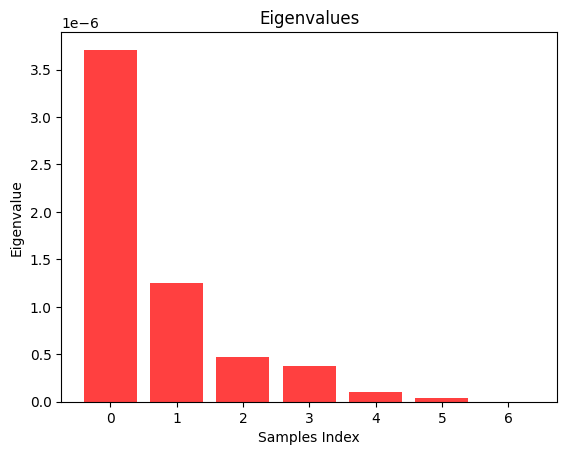

In [43]:
# Estimate the covariance matrix
cov_matrix = np.cov(centered_data.T)
print(f'cov_matrix shape: {cov_matrix.shape}')
print(cov_matrix)


# Perform eigenvectors and eigenvalues decomposition
eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

print(f'eigen_values shape: {eigen_values.shape}')
print(f'eigen_vectors shape: {eigen_vectors.shape}')

print(f'Eigenvalues:{eigen_values}')
print(f'Eigenvectors:{eigen_vectors}')


# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]

# Plot the eigenvalues
plt.figure()
plt.bar(range(len(eigen_values)), eigen_values, color='red', alpha=0.75)
plt.xlabel('Samples Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues')
plt.show()


In [44]:
# Calculate the explained variance ratio
explained_variance_ratio = eigen_values / np.sum(eigen_values)
print(f'Explained Variance Ratio: {explained_variance_ratio}')
print(f'Total Explained Variance: {np.sum(explained_variance_ratio)}')

Explained Variance Ratio: [6.24912261e-01 2.10130981e-01 7.89020659e-02 6.27355531e-02
 1.71061579e-02 6.21298067e-03 1.55988397e-13]
Total Explained Variance: 1.0000000000000002


In [45]:
# Get the cumulative explained variance ratio
importantFeatures = eigen_vectors[:,:5]
print(importantFeatures.shape)

# Get the lower-dimensional data
lowerDimData = np.dot(centered_data, importantFeatures)
print(lowerDimData.shape)

# Reconstruct the data by adding zeros to the lower-dimensional data
prunedDim = 7 - 5 
zerosPadd = np.zeros((lowerDimData.shape[0], prunedDim))
reconstructedData = np.hstack((lowerDimData, zerosPadd))
print(reconstructedData.shape)
print(reconstructedData)

(7, 5)
(1845, 5)
(1845, 7)
[[ 3.42856524e-04  6.78834105e-04  2.47487084e-04 ... -5.69972448e-04
   0.00000000e+00  0.00000000e+00]
 [ 4.75142906e-03 -2.47942862e-03  1.57081759e-03 ... -7.92581440e-05
   0.00000000e+00  0.00000000e+00]
 [ 2.95733291e-03  2.51736244e-03  3.55646011e-04 ... -1.29038618e-04
   0.00000000e+00  0.00000000e+00]
 ...
 [-3.11482507e-03 -8.29942630e-04 -7.61116435e-05 ... -6.69500579e-04
   0.00000000e+00  0.00000000e+00]
 [ 3.06221817e-03  6.00353608e-04 -1.33099164e-03 ... -6.75204772e-04
   0.00000000e+00  0.00000000e+00]
 [-2.93685607e-03  1.50642326e-03  4.66849293e-04 ...  1.74799170e-04
   0.00000000e+00  0.00000000e+00]]


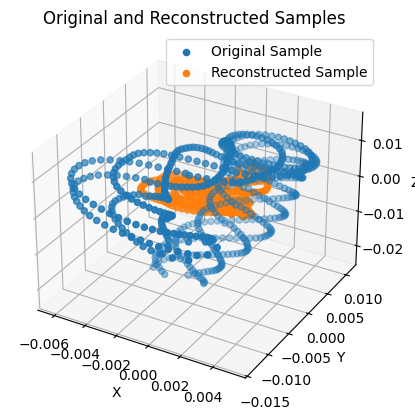

Mean Squared Error: 5.478944076452565e-05


In [46]:
sampleIndex = 0
originalSample = shape_array[:, sampleIndex]
reconstructedSample = reconstructedData[:, sampleIndex]

# Plot the original and reconstructed samples
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1, y1, z1 = originalSample[0::3], originalSample[1::3], originalSample[2::3]
x2, y2, z2 = reconstructedSample[0::3], reconstructedSample[1::3], reconstructedSample[2::3]
ax.scatter(x1, y1, z1, label='Original Sample')
ax.scatter(x2, y2, z2, label='Reconstructed Sample')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Original and Reconstructed Samples')
plt.legend()
plt.show()

# Calculate the mean squared error
reconstructedData = np.mean((shape_array - reconstructedData) ** 2)
print(f'Mean Squared Error: {reconstructedData}')

Explained Variance Ratio: [6.24912261e-01 2.10130981e-01 7.89020659e-02 6.27355531e-02
 1.71061579e-02 6.21298067e-03 1.55988397e-13]


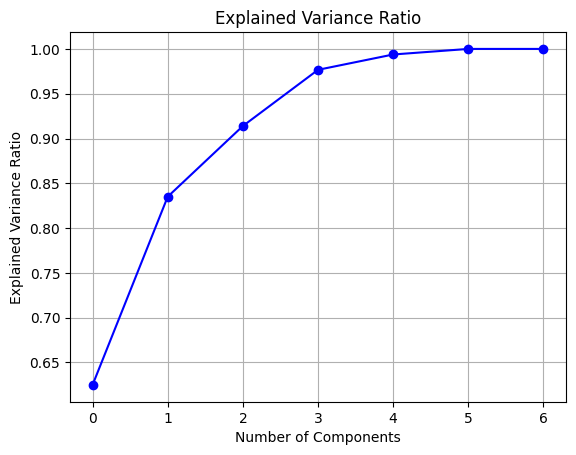

In [47]:
explained_variance_ratio = eigen_values / np.sum(eigen_values)
print(f'Explained Variance Ratio: {explained_variance_ratio}')
culmulative_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
plt.figure()
plt.plot(culmulative_variance, marker='o', color='blue')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [48]:
# Calculate sizes
original_size = shape_array.size  # Total elements in the original array
reduced_size = lowerDimData.size+ importantFeatures.size   # Add any padding if used
reduction_percentage = 100 * (1 - reduced_size / original_size)

# Print results
print(f"Original data size: {original_size}")
print(f"Reduced data size: {reduced_size}")
print(f"Data reduction achieved: {reduction_percentage:.2f}%")


Original data size: 12915
Reduced data size: 9260
Data reduction achieved: 28.30%


The implementation of Principal Component Analysis (PCA) lead into a significant reduction of the dataset size by 28.3% while retaining almost 98% of the original components. This reflects that we where able to apply PCA in order to reduce the dimensionality of the dataset by using covariance matrix which models the covariance between each of the components. Then we got the eigenvectors and eigenvalues which gave us an insight on which of the dimensions has the highest variation and on which direction. Thus, it became a task of choosing the principal compoent while discarding any unneccessary component which may not contribute greatly to the data. In order to ensure that the reduction didn't affect greatly on the dataset we measured the root mean sequare between the original data and the reduced version which yields (5.48 x 10 ^{-5}). Therefore we can conclude that the reduction process was accurate and didn't affect majorly on the dataset data. Thus achieving reduction of dimensionality.

**Q2 c (4 marks)** 

Research PCA analysis using the *scikit-learn* library. Perform PCA analysis and show the reconstructed data of any blood vessel shape on top of the original blood vessel shape. There are variables in the PCA object that correspond to the eigenvalues used for choosing projection eigenvectors. Compare the eigenvalues  and eigenvectors you have computed in the previous question with the eigenvalues  and the eigenvectors computed by the *scikit-learn* library. Compare the reconstructed coordinates from both methods. Comment on your results.

In [49]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
lowerDimDataSci = pca.fit_transform(centered_data.T)
print(lowerDimDataSci.shape)

# Reconstruct the data
reconstructedDataSci = pca.inverse_transform(lowerDimDataSci)

# Print eigenvalues (explained variance) and eigenvectors
print("Scikit-learn Eigenvalues (Explained Variance):", pca.explained_variance_)
print("Scikit-learn Eigenvectors (Principal Components):\n", pca.components_)

(7, 5)
Scikit-learn Eigenvalues (Explained Variance): [1.13989681e-03 3.83298117e-04 1.43924422e-04 1.14435396e-04
 3.12036973e-05]
Scikit-learn Eigenvectors (Principal Components):
 [[ 0.00414567  0.05745336  0.03575949 ... -0.03766389  0.03702777
  -0.03551194]
 [ 0.01415535 -0.0517019   0.05249315 ... -0.01730634  0.01251889
   0.03141248]
 [ 0.00842191  0.0534545   0.0121025  ... -0.00258994 -0.04529306
   0.01588665]
 [ 0.07375837 -0.03702663 -0.02173598 ... -0.05366258 -0.01938101
  -0.01171214]
 [-0.04165632 -0.00579238 -0.00943053 ... -0.04892863 -0.04934677
   0.01277637]]


Manual Eigenvalues: [3.70898826e-06 1.24717243e-06 4.68300679e-07 3.72348959e-07
 1.01528715e-07] 

Scikit-learn Eigenvalues: [1.13989681e-03 3.83298117e-04 1.43924422e-04 1.14435396e-04
 3.12036973e-05] 

Manual Eigenvectors:
 [[-0.10469995  0.16747631 -0.19398707  0.19857125  0.84109765]
 [ 0.57811273  0.52007648  0.06927238  0.23735521 -0.30899057]
 [ 0.42596141 -0.31828866 -0.2759003  -0.7004576   0.06175789]
 [ 0.04210844 -0.70692541  0.41723551  0.36203952 -0.0602692 ]
 [-0.58825096  0.25235194  0.3501954  -0.44862876 -0.17329617]
 [ 0.00112256  0.1713026   0.32524227  0.07654509  0.03744345]
 [-0.35435421 -0.08599336 -0.6920582   0.27457529 -0.39774312]] 

Scikit-learn Eigenvectors:
 [[ 0.00414567  0.01415535  0.00842191  0.07375837 -0.04165632]
 [ 0.05745336 -0.0517019   0.0534545  -0.03702663 -0.00579238]
 [ 0.03575949  0.05249315  0.0121025  -0.02173598 -0.00943053]
 ...
 [-0.03766389 -0.01730634 -0.00258994 -0.05366258 -0.04892863]
 [ 0.03702777  0.01251889 -0.04529306 -0.01

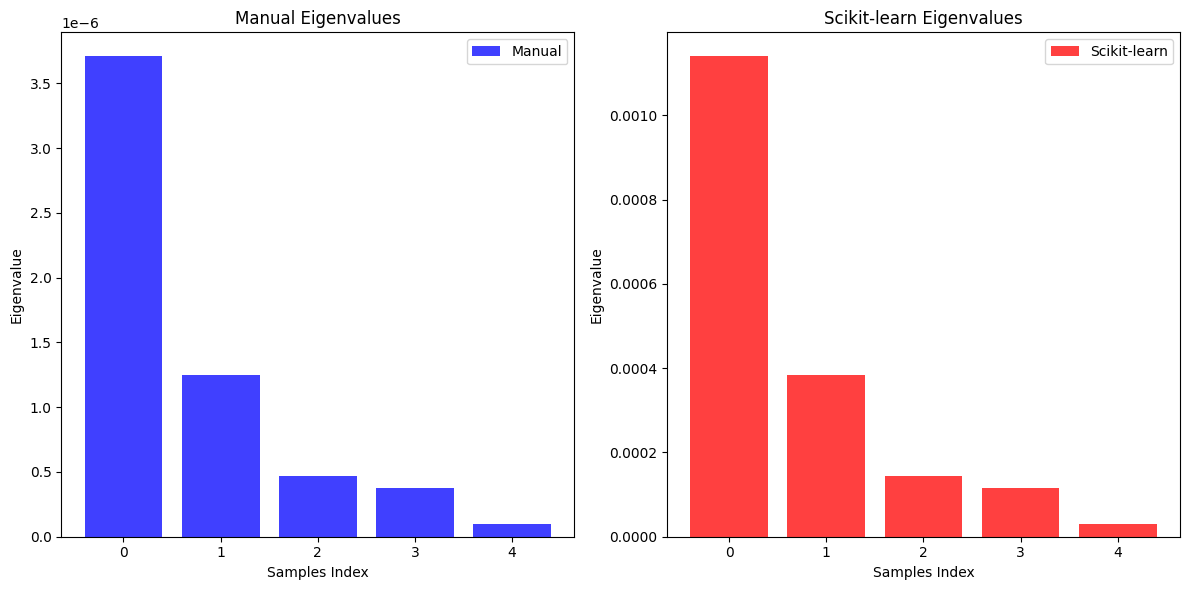

In [54]:
# Compare eigenvalues
manual_eigenvalues = eigen_values[:5]  # Top 5 from manual computation
sklearn_eigenvalues = pca.explained_variance_
print("Manual Eigenvalues:", manual_eigenvalues, "\n")
print("Scikit-learn Eigenvalues:", sklearn_eigenvalues , "\n")

# Compare eigenvectors
manual_eigenvectors = importantFeatures  # Top 5 eigenvectors from manual computation
sklearn_eigenvectors = pca.components_.T  # Scikit-learn eigenvectors are transposed
print("Manual Eigenvectors:\n", manual_eigenvectors, "\n")
print("Scikit-learn Eigenvectors:\n", sklearn_eigenvectors, "\n")

# Calculate the mean squared error
reconstructedDataSci = np.mean((shape_array - reconstructedDataSci.T) ** 2)

print(f'Mean Squared Error of SciPy PCA: {reconstructedDataSci}')
print(f'Mean Squared Error of manual PCA: {reconstructedData}')

# Comapre the results using bar chart
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(range(len(manual_eigenvalues)), manual_eigenvalues, color='blue', alpha=0.75, label='Manual')
ax[0].set_xlabel('Samples Index')
ax[0].set_ylabel('Eigenvalue')
ax[0].set_title('Manual Eigenvalues')
ax[0].legend()

ax[1].bar(range(len(sklearn_eigenvalues)), sklearn_eigenvalues, color='red', alpha=0.75, label='Scikit-learn')
ax[1].set_xlabel('Samples Index')
ax[1].set_ylabel('Eigenvalue')
ax[1].set_title('Scikit-learn Eigenvalues')
ax[1].legend()

plt.tight_layout()
plt.show()

Based on the result of the computation, we can observe that values of the eigenvalues and eigenvectors that are calculated manually are different in magnitude. Considering the fact that each of the methods has its own appraoch when dealing with floating numbers and computation techniques. Suprisingly the  relative ranking of the principal components are equal thus indicates the consistency of both methods in obtaining the eigenvalues. Both methods produces the similar reconstrcution as seen by computing the mean square error. There is a small difference in the Manual PCA MSE and SciKit PCA MSE. This small difference indicate that both methods were able to capture the principal components. Now in terms of compuitational efficiency, scikit learn is much more efficent and fault tolerent than the Manual PCA because there is a chance of error while dealing with numerical computation multiple times. Besides that, its eaiser to use scikit learn function to perform PCA especially dealing with large dataset the requires dense computations taken place.